# i-Team A Scientific Research Notebook with Weaviate, an Open Source Vector Search Engine

https://weaviate-python-client.readthedocs.io/en/stable/weaviate.data.html

In [1]:
#Requirements: Installed weaviate, json, pandas, seaborn, matplotlib

import weaviate
import json

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#Access to database

client = weaviate.Client('http://localhost:8888/')

In [3]:
#Check if client is ready

client.is_ready()

True

In [4]:
#Example query to get some data from weaviate database

query1 = client.query\
        .get("Article", ["type","language","readability","anger","fear"])\
        .with_limit(10000)\
        .do()

In [5]:
#Creating a dataframe for scientific research and data analysis

df = pd.json_normalize(query1['data']['Get']['Article'])

In [6]:
#Show dataframe

df.head()

,anger,fear,language,readability,type
0,0.013,0.905,en,62.68,article
1,0.034,0.953,en,96.18,social_media
2,0.193,0.786,en,47.96,social_media
3,0.695,0.007,en,99.23,social_media
4,0.214,0.236,en,49.49,social_media


In [7]:
#let's do some cleaning on the dataset, here for the case if readiblitiy score is negative

df_cleaned = df.loc[df['readability'] >= 0]

In [8]:
#Let's show some info

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9713 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   anger        9702 non-null   float64
 1   fear         9702 non-null   float64
 2   language     9713 non-null   object 
 3   readability  9713 non-null   float64
 4   type         9713 non-null   object 
dtypes: float64(3), object(2)
memory usage: 455.3+ KB


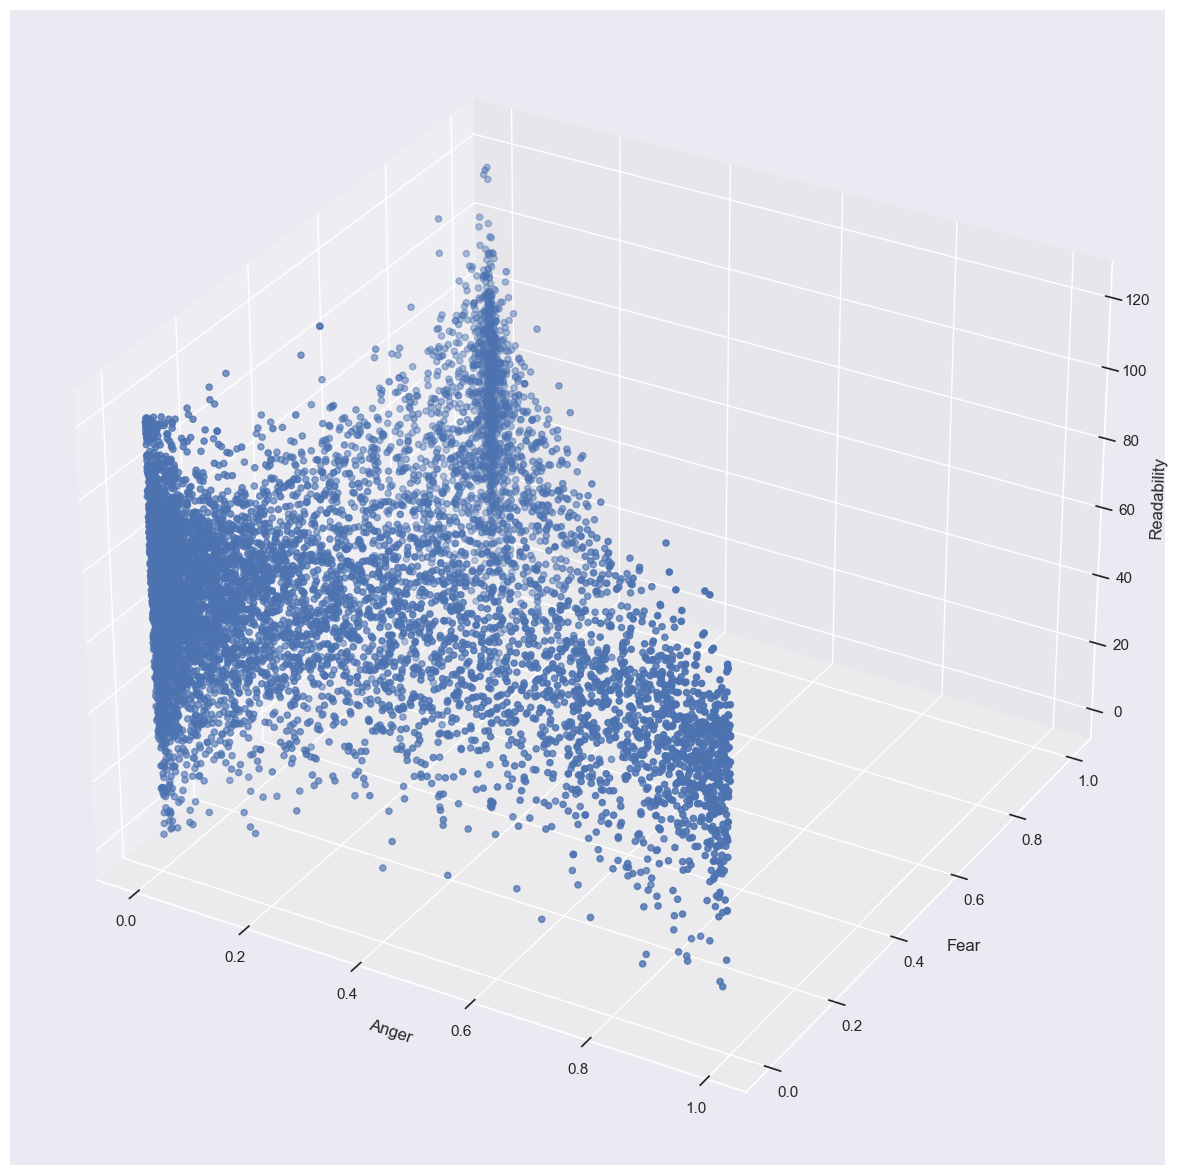

In [10]:
#Now we are creating a 3d scatterplot for some analysis

sns.set(style = "darkgrid")
sns.set(rc={'figure.figsize':(20,15)})
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')


x = df_cleaned['anger']
y = df_cleaned['fear']
z = df_cleaned['readability']

ax.set_xlabel("Anger")
ax.set_ylabel("Fear")
ax.set_zlabel("Readability")

ax.scatter(x, y, z)

plt.show()

In [ ]:
#Let's see if we can see a graph with 